In [191]:
from astropy.table import Table
import numpy as np
import copy

t_single = Table.read('./final_spec/single_cut_with_skew_width.csv', format='ascii.csv')
t_double = Table.read('./final_spec/double_cut_with_skew_width.csv', format='ascii.csv')

t_single.sort('peak_sn')
t_single.reverse()
t_double.sort('peak_sn')
t_double.reverse()

t_single.write('./final_spec/single_cut_with_skew_width_ordered.csv',format='ascii.csv',overwrite=True)
t_double.write('./final_spec/double_cut_with_skew_width_ordered.csv',format='ascii.csv',overwrite=True)

In [192]:
t_double.info

<Table length=52>
     name      dtype 
------------- -------
        plate   int64
          mjd   int64
        fiber   int64
          tag    str6
         note    str6
 sn_peak_wave float64
      peak_sn float64
      spec_id   int64
      peak_id   int64
if_multi_line    str5
    main_wave float64
main_skewness float64
    main_flux float64
   main_width float64
     sub_wave float64
 sub_skewness float64
     sub_flux float64
    sub_width float64
     tot_flux float64
           ra float64
          dec float64
          z_l float64
          z_s float64
        vdisp float64
       thetaE float64
 cmodel_mag_i float64
  model_mag_i float64

In [193]:
zs_single = t_single['z_s']
zl_single = t_single['z_l']
thetaE_single = t_single['thetaE']
skew_single = t_single['main_skewness']

zs_double = t_double['z_s']
zl_double = t_double['z_l']
theta_double = t_double['thetaE']
skew_double = t_double['main_skewness']

In [194]:
id1 = np.where(zl_single>0.7)
id2 = np.where(zl_double>0.7)
print(id1[0].size,id2[0].size)

(28, 5)


In [195]:
(28+5)*1.0/(231+52)

0.1166077738515901

In [279]:
#use gaussian kernel density eistimation
from scipy import stats

def kde_plot(data,ax=None,**kargs):
    kernel1 = stats.gaussian_kde(data,bw_method="scott")
    #kernel2 = stats.gaussian_kde(data,bw_method="silverman")
    bins = np.linspace(data.min(),data.max(),100)
    if ax is not None:
        ax.plot(bins,kernel1(bins),**kargs) #len(data)*(bins[1]-bins[0])
        #ax.plot(bins,len(data)*kernel2(bins))
    return bins,kernel1(bins),kernel1 #,kernel2(bins)

def kde_plot_y(data,ax=None,**kargs):
    kernel1 = stats.gaussian_kde(data,bw_method="scott")
    #kernel2 = stats.gaussian_kde(data,bw_method="silverman")
    bins = np.linspace(data.min(),data.max(),100)
    if ax is not None:
        ax.plot(kernel1(bins),bins,**kargs) #len(data)*(bins[1]-bins[0])
        #ax.plot(bins,len(data)*kernel2(bins))
    return bins,kernel1(bins),kernel1 #,kernel2(bins)

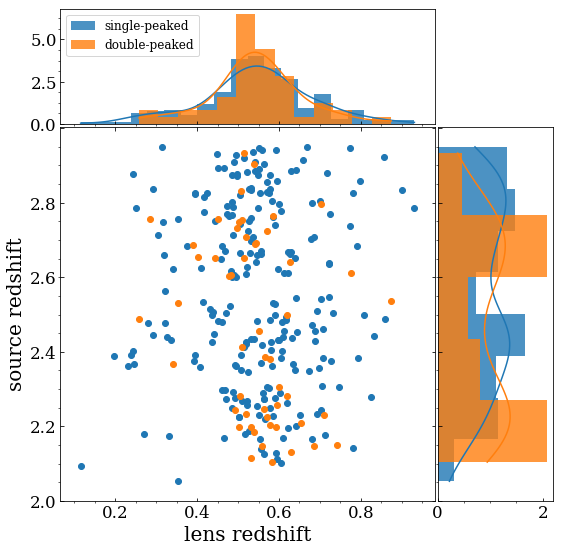

In [314]:
#https://stackoverflow.com/questions/20350503/remove-first-and-last-ticks-label-of-each-y-axis-subplot
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import hist
%matplotlib inline
font = {'family':'serif', 'size':20}
plt.rc('font', **font)
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rc('axes', labelsize='medium')


# the random data
xs = zl_single
ys = zs_single

xd = zl_double
yd = zs_double


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(8, 8))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)
c_s = 'C0'
c_d = 'C1'

# the scatter plot:
ax_scatter.scatter(xs, ys,color=c_s)
ax_scatter.scatter(xd, yd,color=c_d)
plt.draw()
label_y = ax_scatter.get_yticklabels()
#print('------',label_y[:])
label_y[-2:] = ""
ax_scatter.set_yticklabels(label_y)

# now determine nice limits by hand:
#binwidth = 0.25
#lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
#ax_scatter.set_xlim((-lim, lim))
#ax_scatter.set_ylim((-lim, lim))

#bins = np.arange(-lim, lim + binwidth, binwidth)
#matplotlib 'autohistgram'
#ax_histx.hist(xs, bins='auto',alpha=0.8, density=True,label='single-peaked',color=c_s)
#ax_histy.hist(ys, bins='auto', orientation='horizontal',alpha=0.8, density=True,label='single-peaked',color=c_s)
#ax_histx.hist(xd, bins='auto',alpha=0.8, density=True,label='double-peaked',color=c_d)
#ax_histy.hist(yd, bins='auto', orientation='horizontal',alpha=0.8, density=True,label='double-peaked',color=c_d)

bins='knuth'
hist(xs, bins=bins, ax=ax_histx, histtype='stepfilled',alpha=0.8, density=True,label='single-peaked',color=c_s)
hist(ys, bins=bins, ax=ax_histy, histtype='stepfilled',alpha=0.8, density=True,orientation='horizontal',color=c_s)
hist(xd, bins=bins, ax=ax_histx, histtype='stepfilled',alpha=0.8, density=True,label='double-peaked',color=c_d)
hist(yd, bins=bins, ax=ax_histy, histtype='stepfilled',alpha=0.8, density=True,orientation='horizontal',color=c_d)
kde_bin_xs, kde_pdf_xs, kernel_xs = kde_plot(xs,ax=ax_histx,color=c_s)
kde_bin_xd, kde_pdf_xd, kernel_xd = kde_plot(xd,ax=ax_histx,color=c_d)
kde_bin_ys, kde_pdf_ys, kernel_ys = kde_plot_y(ys,ax=ax_histy,color=c_s)
kde_bin_yd, kde_pdf_yd, kernel_yd = kde_plot_y(yd,ax=ax_histy,color=c_d)

ax_histx.legend(loc=2,prop={'family':'serif','size': 12})
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_scatter.set_xlabel(r'lens redshift') #,fontsize=20
ax_scatter.set_ylabel(r'source redshift')
ax_scatter.minorticks_on()
ax_histx.minorticks_on()
ax_histy.minorticks_on()
plt.show()
fig.savefig('./redshif_dist.pdf',bbox_inches='tight')

In [282]:
print(rect_scatter) 
print(rect_histx)
print(rect_histy)

[0.1, 0.1, 0.65, 0.65]
[0.1, 0.755, 0.65, 0.2]
[0.755, 0.1, 0.2, 0.65]


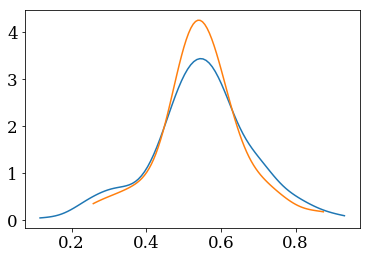

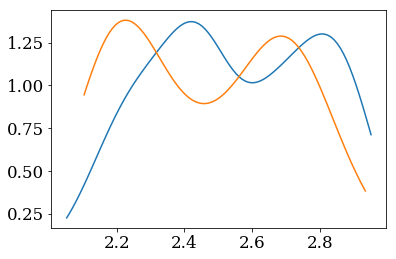

In [215]:
fig = plt.figure()
plt.plot(kde_bin_xs, kde_pdf_xs)
plt.plot(kde_bin_xd, kde_pdf_xd)
plt.show()
plt.figure()
plt.plot(kde_bin_ys, kde_pdf_ys)
plt.plot(kde_bin_yd, kde_pdf_yd)
plt.show()

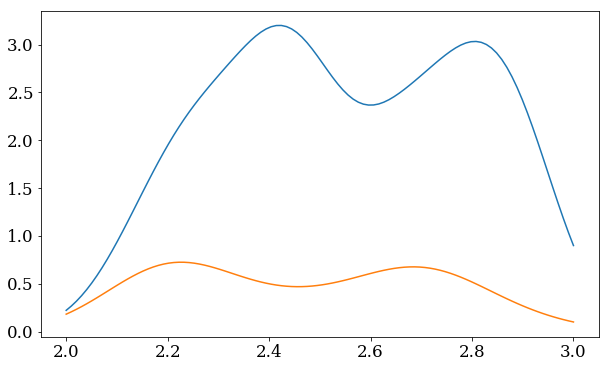

Text(0,0.5,'Fraction')

<Figure size 432x288 with 0 Axes>

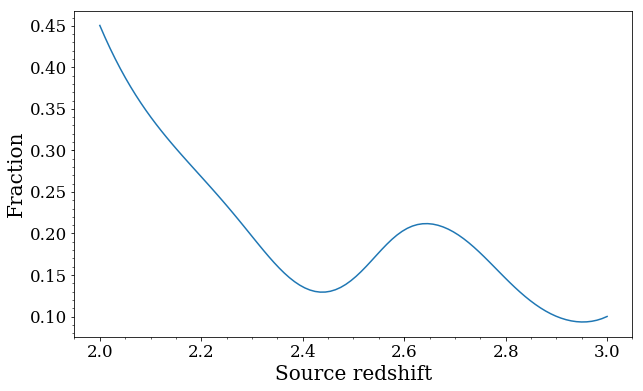

In [288]:
bins = np.linspace(2.0, 3.0,100)
pdf_yd = kernel_yd(bins)
pdf_ys = kernel_ys(bins)

binsize = bins[1] - bins[0]
num_yd = pdf_yd * binsize * yd.size
num_ys = pdf_ys * binsize * ys.size
num_ytot = num_ys + num_yd

fig = plt.figure(figsize=(10, 6))
plt.plot(bins, num_ys)
plt.plot(bins, num_yd)
plt.show()

fig = plt.figure()
fig = plt.figure(figsize=(10, 6))
plt.plot(bins, num_yd/num_ytot)
plt.minorticks_on()
#plt.title('Double-peaked candidates faction')
plt.xlabel('Source redshift')
plt.ylabel('Fraction')
#fig.savefig('./double_peak_fraction.pdf',bbox_inches='tight')

In [261]:
num_yd.sum()/num_ytot.sum()

0.18214924763836213

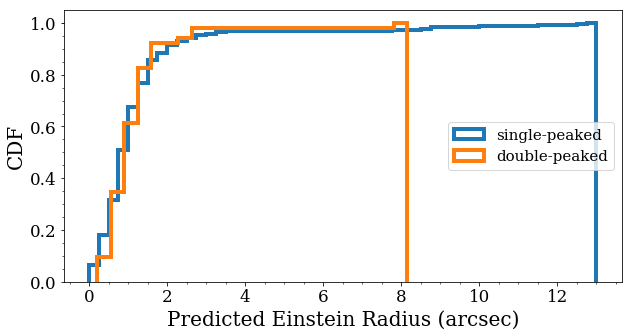

In [101]:
import numpy as np
import matplotlib.pyplot as plt

font = {'family':'serif', 'size':20}
plt.rc('font', **font)
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rc('axes', labelsize='medium')

xs = thetaE_single
xd = theta_double

ids = np.where(xs<100)
xs_new = xs[ids]
idd = np.where(xd<100)
xd_new = xd[idd]

#n_bins = 20
fig, ax = plt.subplots(figsize=(10, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(xs_new, bins='auto', density=True, histtype='step',
                           cumulative=True, label='single-peaked',linewidth=4)
n, bins, patches = ax.hist(xd_new, bins='auto', density=True, histtype='step',
                           cumulative=True, label='double-peaked',linewidth=4)

# tidy up the figure
#ax.grid(True)
ax.legend(loc=7,prop={'family':'serif','size': 15})
#ax.set_title('')
ax.set_xlabel('Predicted Einstein Radius (arcsec)') #,fontsize=20
ax.set_ylabel('CDF')
plt.minorticks_on()
plt.show()
fig.savefig('./einstein_radius.pdf',bbox_inches='tight')

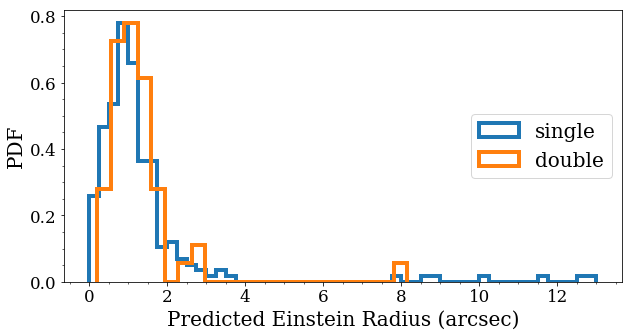

In [73]:
import numpy as np
import matplotlib.pyplot as plt

font = {'family':'serif', 'size':20}
plt.rc('font', **font)
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rc('axes', labelsize='medium')

xs = thetaE_single
xd = theta_double

ids = np.where(xs<100)
xs_new = xs[ids]
idd = np.where(xd<100)
xd_new = xd[idd]

fig, ax = plt.subplots(figsize=(10, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(xs_new,  bins='auto', density=True, histtype='step',
                           cumulative=False, label='single',linewidth=4)
n, bins, patches = ax.hist(xd_new,  bins='auto', density=True, histtype='step',
                           cumulative=False, label='double',linewidth=4)

# tidy up the figure
#ax.grid(True)
ax.legend(loc='right')
#ax.set_title('')
ax.set_xlabel('Predicted Einstein Radius (arcsec)') #,fontsize=20
ax.set_ylabel('PDF')
plt.minorticks_on()
plt.show()
fig.savefig('./einstein_radius_pdf.pdf',bbox_inches='tight')

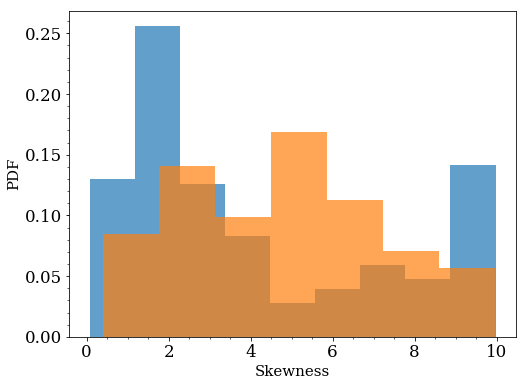

In [70]:
import numpy as np
import matplotlib.pyplot as plt


# the random data
xs = skew_single
xd = skew_double

fig = plt.figure(figsize=(4*2, 3*2))
plt.hist(xs,bins='auto',density=True,alpha=0.7)
plt.hist(xd,bins='auto',density=True,alpha=0.7)

plt.xlabel(r'Skewness',fontsize=15)
plt.ylabel(r'PDF',fontsize=15)
plt.minorticks_on()
plt.show()
fig.savefig('./skewness.pdf',bbox_inches='tight')

(array([1.94898956, 1.46174217, 0.81207898, 0.64966319, 1.62415796,
        1.46174217, 0.48724739]),
 array([2.10420627, 2.22261082, 2.34101537, 2.45941992, 2.57782447,
        2.69622902, 2.81463357, 2.93303812]),
 <a list of 7 Patch objects>)

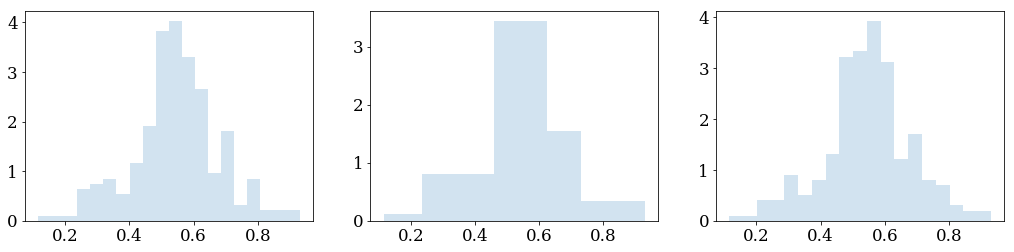

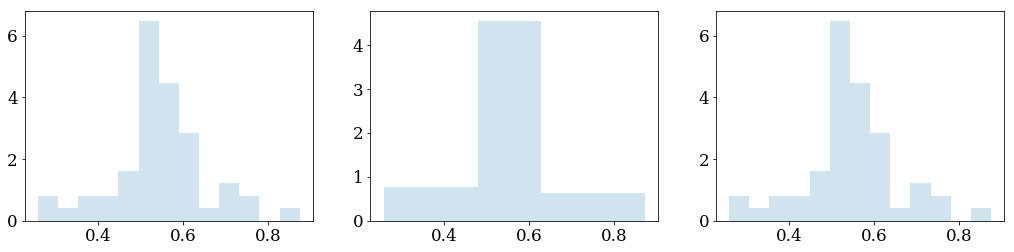

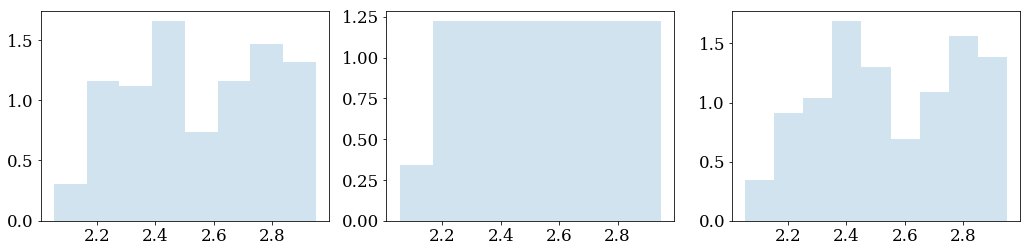

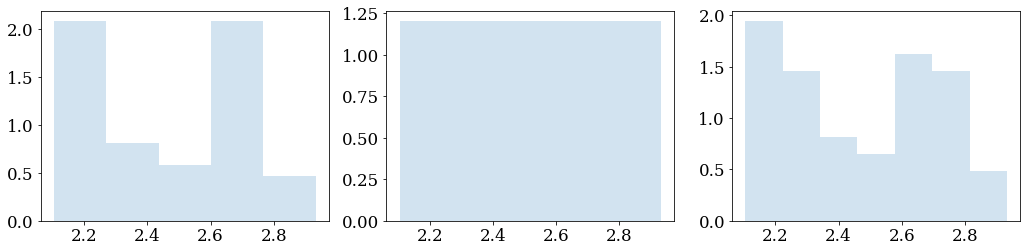

In [115]:
#bayesian histgram for redshift
#https://docs.astropy.org/en/stable/visualization/histogram.html
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

from astropy.visualization import hist

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
for i, bins in enumerate(['knuth', 'blocks']):
    hist(xs, bins=bins, ax=ax[i], histtype='stepfilled',
            alpha=0.2, density=True)
ax[2].hist(xs, bins='auto',label='single-peaked-lens',alpha=0.2,density=True)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
for i, bins in enumerate(['knuth', 'blocks']):
    hist(xd, bins=bins, ax=ax[i], histtype='stepfilled',
            alpha=0.2, density=True)
ax[2].hist(xd, bins='auto',label='single-peaked-lens',alpha=0.2,density=True)
    
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
for i, bins in enumerate(['knuth', 'blocks']):
    hist(ys, bins=bins, ax=ax[i], histtype='stepfilled',
            alpha=0.2, density=True)
ax[2].hist(ys, bins='auto',label='single-peaked-lens',alpha=0.2,density=True)
    
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
for i, bins in enumerate(['knuth', 'blocks']):
    hist(yd, bins=bins, ax=ax[i], histtype='stepfilled',
            alpha=0.2, density=True)
ax[2].hist(yd, bins='auto',label='single-peaked-lens',alpha=0.2,density=True)

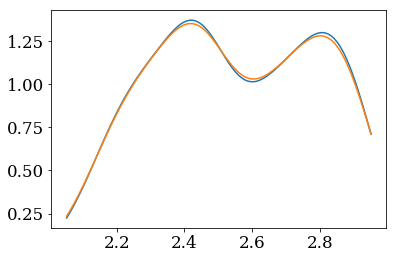

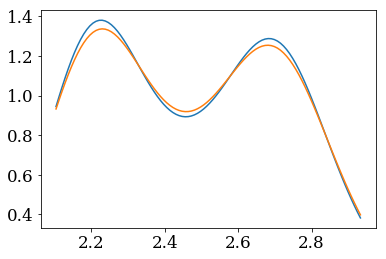

In [177]:
#use gaussian kernel density eistimation
from scipy import stats

def kde_plot(data,ax=None):
    kernel1 = stats.gaussian_kde(data,bw_method="scott")
    kernel2 = stats.gaussian_kde(data,bw_method="silverman")
    bins = np.linspace(data.min(),data.max(),100)
    if ax is not None:
        ax.plot(bins,kernel1(bins))
        ax.plot(bins,kernel2(bins))
    return bins,kernel1(bins),kernel2(bins)

fig,ax = plt.subplots()
kde_plot(ys,ax);

fig,ax = plt.subplots()
kde_plot(yd,ax);

In [133]:
#make sure the valley is not due to the cutting
np.log10(1216*(1+2.5))

3.6290016192869916

In [134]:
1216*(1+2.5)

4256.0

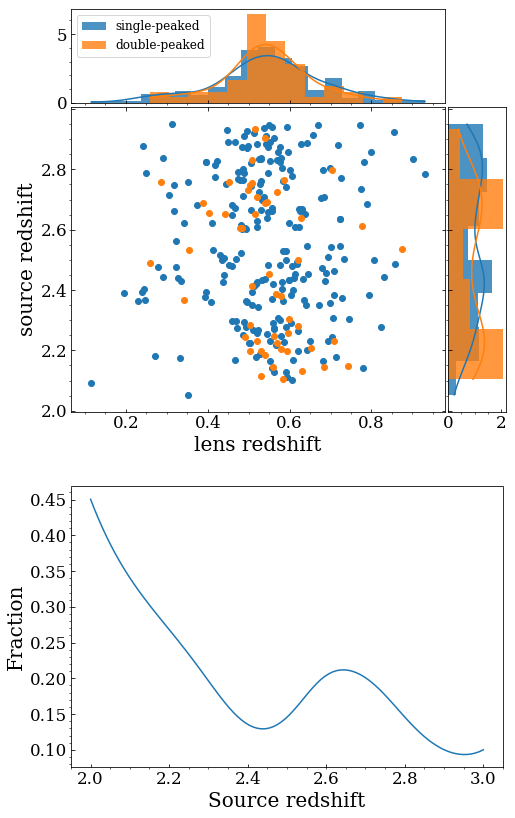

In [312]:
#https://stackoverflow.com/questions/20350503/remove-first-and-last-ticks-label-of-each-y-axis-subplot
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import hist
%matplotlib inline
font = {'family':'serif', 'size':20}
plt.rc('font', **font)
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rc('axes', labelsize='medium')


# the random data
xs = zl_single
ys = zs_single

xd = zl_double
yd = zs_double


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.5, 0.65/2.0
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2/2.0]
rect_histy = [left + width + spacing, bottom, 0.2/2.0, height]
rect_frac = [0.1, 0.12, 0.75, 0.3]

# start with a rectangular Figure
fig = plt.figure(figsize=(8, 13))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)
ax_frac = plt.axes(rect_frac)
ax_frac.tick_params(direction='in')
c_s = 'C0'
c_d = 'C1'

# the scatter plot:
ax_scatter.scatter(xs, ys,color=c_s)
ax_scatter.scatter(xd, yd,color=c_d)
plt.draw()
label_y = ax_scatter.get_yticklabels()
#print('------',label_y[:])
label_y[-2:] = ""
ax_scatter.set_yticklabels(label_y)

bins='knuth'
hist(xs, bins=bins, ax=ax_histx, histtype='stepfilled',alpha=0.8, density=True,label='single-peaked',color=c_s)
hist(ys, bins=bins, ax=ax_histy, histtype='stepfilled',alpha=0.8, density=True,orientation='horizontal',color=c_s)
hist(xd, bins=bins, ax=ax_histx, histtype='stepfilled',alpha=0.8, density=True,label='double-peaked',color=c_d)
hist(yd, bins=bins, ax=ax_histy, histtype='stepfilled',alpha=0.8, density=True,orientation='horizontal',color=c_d)
kde_bin_xs, kde_pdf_xs, kernel_xs = kde_plot(xs,ax=ax_histx,color=c_s)
kde_bin_xd, kde_pdf_xd, kernel_xd = kde_plot(xd,ax=ax_histx,color=c_d)
kde_bin_ys, kde_pdf_ys, kernel_ys = kde_plot_y(ys,ax=ax_histy,color=c_s)
kde_bin_yd, kde_pdf_yd, kernel_yd = kde_plot_y(yd,ax=ax_histy,color=c_d)

ax_histx.legend(loc=2,prop={'family':'serif','size': 12})
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_scatter.set_xlabel(r'lens redshift') #,fontsize=20
ax_scatter.set_ylabel(r'source redshift')
ax_scatter.minorticks_on()
ax_histx.minorticks_on()
ax_histy.minorticks_on()

bins = np.linspace(2.0, 3.0,100)
pdf_yd = kernel_yd(bins)
pdf_ys = kernel_ys(bins)

binsize = bins[1] - bins[0]
num_yd = pdf_yd * binsize * yd.size
num_ys = pdf_ys * binsize * ys.size
num_ytot = num_ys + num_yd

ax_frac.plot(bins, num_yd/num_ytot)
ax_frac.minorticks_on()
ax_frac.set_xlabel('Source redshift')
ax_frac.set_ylabel('Fraction')

plt.show()
fig.savefig('./redshif_dist.pdf',bbox_inches='tight')